In [114]:
import numpy as np
from shapely.geometry import Point, Polygon
from shapely.geometry.polygon import LinearRing, LineString
import pandas as pd
import matplotlib.pyplot as plt
import math

In [115]:
# TRACK_NAME = "reInvent2019_track"
TRACK_NAME = "Canada_Training"
waypoints = np.load("./%s.npy" % TRACK_NAME)

In [116]:
center_line = waypoints[:,0:2]
inner_border = waypoints[:,2:4]
outer_border = waypoints[:,4:6]
l_center_line = LineString(center_line)
l_inner_border = LineString(inner_border)
l_outer_border = LineString(outer_border)

In [117]:
for x in range(0,155):
    print(str(x)+" : ")
    print(center_line[x])

0 : 
[4.60918546 1.6430465 ]
1 : 
[4.50431919 1.67146498]
2 : 
[4.39907455 1.69846398]
3 : 
[4.29348302 1.72413248]
4 : 
[4.18765545 1.74877203]
5 : 
[4.08169842 1.77272302]
6 : 
[3.975631   1.79626352]
7 : 
[3.86950552 1.81977445]
8 : 
[3.76360047 1.8441065 ]
9 : 
[3.65815759 1.8700285 ]
10 : 
[3.55305755 1.89752454]
11 : 
[3.44811702 1.92617106]
12 : 
[3.34326446 1.95471454]
13 : 
[3.23838747 1.98214352]
14 : 
[3.13192952 2.00926554]
15 : 
[3.02654493 2.04065853]
16 : 
[2.92398453 2.07964951]
17 : 
[2.82595205 2.12832248]
18 : 
[2.73254597 2.18519408]
19 : 
[2.64291656 2.2447015 ]
20 : 
[2.55430901 2.30580747]
21 : 
[2.46644592 2.36559844]
22 : 
[2.37733853 2.42745507]
23 : 
[2.28847849 2.48986053]
24 : 
[2.197837   2.54959548]
25 : 
[2.10291696 2.60276747]
26 : 
[2.00255448 2.64536297]
27 : 
[1.89758098 2.67366898]
28 : 
[1.78971398 2.68609703]
29 : 
[1.68137252 2.68195498]
30 : 
[1.57499701 2.66074347]
31 : 
[1.472601   2.62435448]
32 : 
[1.37485301 2.57587004]
33 : 
[1.2817505  2.

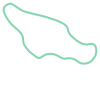

In [118]:
l_inner_border

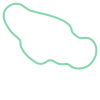

In [119]:
l_outer_border

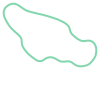

In [120]:
l_center_line

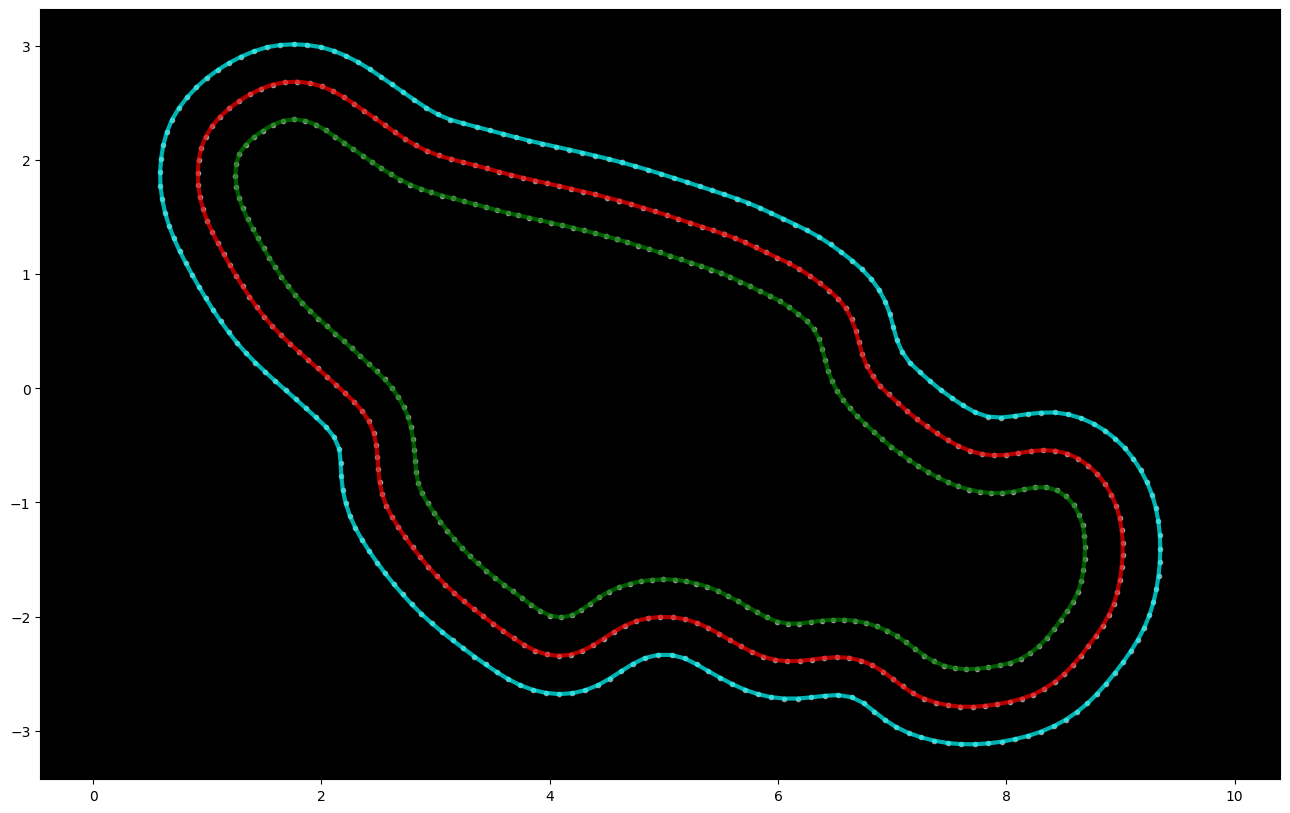

In [121]:
def plot_coords(ax, ob):                                                        
    x, y = ob.xy                                                                
    ax.plot(x, y, '.', color='#999999', zorder=1)                               
                                                                                
def plot_bounds(ax, ob):                                                        
    x, y = zip(*list((p.x, p.y) for p in ob.boundary))                          
    ax.plot(x, y, '.', color='#000000', zorder=1)                               
                                                                                
def plot_line(ax, ob, _color):                                                          
    x, y = ob.xy                                                                
    ax.plot(x, y, color=_color, alpha=0.7, linewidth=3, solid_capstyle='round', zorder=2)
                                                                                
def print_border(ax, waypoints, inner_border_waypoints, outer_border_waypoints):
    line = LineString(waypoints)                                                
    plot_coords(ax, line)                                                       
    plot_line(ax, line, 'red')                                                         
                                                                                
    line = LineString(inner_border_waypoints)                                   
    plot_coords(ax, line)                                                       
    plot_line(ax, line, 'green')                                                         
                                                                                
    line = LineString(outer_border_waypoints)                                   
    plot_coords(ax, line)                                                       
    plot_line(ax, line, 'cyan')     

fig = plt.figure(1, figsize=(16, 10))
ax = fig.add_subplot(111, facecolor='black')
plt.axis('equal')
print_border(ax, center_line, inner_border, outer_border)

In [122]:
center_line.size
center_line.shape


(203, 2)

In [123]:
perpendicular_slope = []
length = center_line.shape[0]

def slope_division(n, d, x):
    if n == 0 and d == 0 and len(perpendicular_slope) >= (x-1)%length:
        return -1 * (1/perpendicular_slope[(x-1)%length])
    return n / d if d else None

for x in range(0,length):
    a = center_line[x]
    b = center_line[(x+1)%length]
    slope = slope_division((b[1] - a[1]),(b[0] - a[0]), x)
#     slope = ((a[1] - b[1])/(a[0] - b[0]))
    print("Slope for " + str(x) + " : " + str(slope))
    
    if slope is None:
        perpendicular_slope.append(0)
#         continue
    elif slope == 0:
        perpendicular_slope.append(None)
#         continue
    else:
        perpendicular_slope.append(-1*(1/slope))
    
    print("Perpendicular Slope for " + str(x) + " : " + str(perpendicular_slope[x]))
    

Slope for 0 : -0.27099736040978445
Perpendicular Slope for 0 : 3.6900728423622486
Slope for 1 : -0.2565356071658345
Perpendicular Slope for 1 : 3.898094346620512
Slope for 2 : -0.24309241944260673
Perpendicular Slope for 2 : 4.113661801108103
Slope for 3 : -0.2328272951947967
Perpendicular Slope for 3 : 4.295029065055893
Slope for 4 : -0.2260444043418779
Perpendicular Slope for 4 : 4.42390955401649
Slope for 5 : -0.22193899914358736
Perpendicular Slope for 5 : 4.505742586290714
Slope for 6 : -0.22153901454094097
Perpendicular Slope for 6 : 4.513877621384822
Slope for 7 : -0.2297533982593348
Perpendicular Slope for 7 : 4.352492749078937
Slope for 8 : -0.24583926405198758
Perpendicular Slope for 8 : 4.067698477117675
Slope for 9 : -0.26161779768001336
Perpendicular Slope for 9 : 3.8223699185141347
Slope for 10 : -0.27297868352446025
Perpendicular Slope for 10 : 3.6632897011916135
Slope for 11 : -0.2722248560939644
Perpendicular Slope for 11 : 3.6734338456398263
Slope for 12 : -0.26153480

In [124]:
rows, cols = (center_line.shape[0], center_line.shape[1])

distance = 0.5

def isLeft(a, b, c):
     return ((b[0] - a[0])*(c[1] - a[1]) - (b[1] - a[1])*(c[0] - a[0])) > 0;

new_outer_points = [[0 for i in range(cols)] for j in range(rows)]
new_inner_points = [[0 for i in range(cols)] for j in range(rows)]

for x in range(0, length):
    print(str(x) +" : ")
    if perpendicular_slope[x] is None: 
        new_outer_points[x][0] = center_line[x][0]
        new_outer_points[x][1] = center_line[x][1]  - distance
        new_inner_points[x][0] = center_line[x][0]
        new_inner_points[x][1] = center_line[x][1]  + distance
        print("Zero detected")
    elif perpendicular_slope[x] == 0:
        new_outer_points[x][0] = center_line[x][0]  - distance
        new_outer_points[x][1] = center_line[x][1]  
        new_inner_points[x][0] = center_line[x][0]  + distance
        new_inner_points[x][1] = center_line[x][1]  
        print("None detected")
    else:    
        dx = distance / (math.sqrt((1+(perpendicular_slope[x]**2))))
        print(dx)
        dy = perpendicular_slope[x] * dx
        print(dy)

        new_point = [0] * 2
        new_point[0] = center_line[x][0] - dx
        new_point[1] = center_line[x][1] - dy
        pointOnLeft = isLeft(center_line[x], center_line[(x+1)%length], new_point)
        print("IS IT LEFT : " + str(pointOnLeft))
        if (pointOnLeft):
            new_outer_points[x][0] = center_line[x][0] + dx
            new_outer_points[x][1] = center_line[x][1] + dy
            print("Left here Outside")
            new_inner_points[x][0] = new_point[0]
            new_inner_points[x][1] = new_point[1]
            print("Right here Inside")
            
        else:
            new_outer_points[x][0] = new_point[0]
            new_outer_points[x][1] = new_point[1]
            print("Right here Outside")
            new_inner_points[x][0] = center_line[x][0] + dx
            new_inner_points[x][1] = center_line[x][1] + dy
            print("Left here Inside")
            
        
            

#     new_sub_points[x][0] = center_line[x][0] - (distance * (math.sqrt(1/(1+(perpendicular_slope[x]**2)))))
#     new_sub_points[x][1] = center_line[x][1] - ((distance * perpendicular_slope[x])  * (math.sqrt(1/(1+(perpendicular_slope[x]**2)))))
    
    print(new_outer_points[x])
    print(new_inner_points[x])
    

0 : 
0.13078148516331886
0.4825932066849643
IS IT LEFT : True
Left here Outside
Right here Inside
[4.739966942392933, 2.1256397049836093]
[4.478403972066295, 1.1604532916136807]
1 : 
0.1242446386265587
0.4843173234280969
IS IT LEFT : True
Left here Outside
Right here Inside
[4.628563829605563, 2.155782303076687]
[4.380074552352445, 1.1871476562204932]
2 : 
0.1181066039893066
0.4858506252894124
IS IT LEFT : True
Left here Outside
Right here Inside
[4.517181158432666, 2.1843146016726216]
[4.280967950454053, 1.2126133510937969]
3 : 
0.11338109064240762
0.4869750797368774
IS IT LEFT : True
Left here Outside
Right here Inside
[4.40686410951753, 2.2111075579740294]
[4.180101928232714, 1.2371573985002746]
4 : 
0.11024085130805107
0.48769555534459835
IS IT LEFT : True
Left here Outside
Right here Inside
[4.297896300221625, 2.2364675804529357]
[4.077414597605523, 1.261076469763739]
5 : 
0.10833348309076367
0.48812278828325883
IS IT LEFT : True
Left here Outside
Right here Inside
[4.190031900754

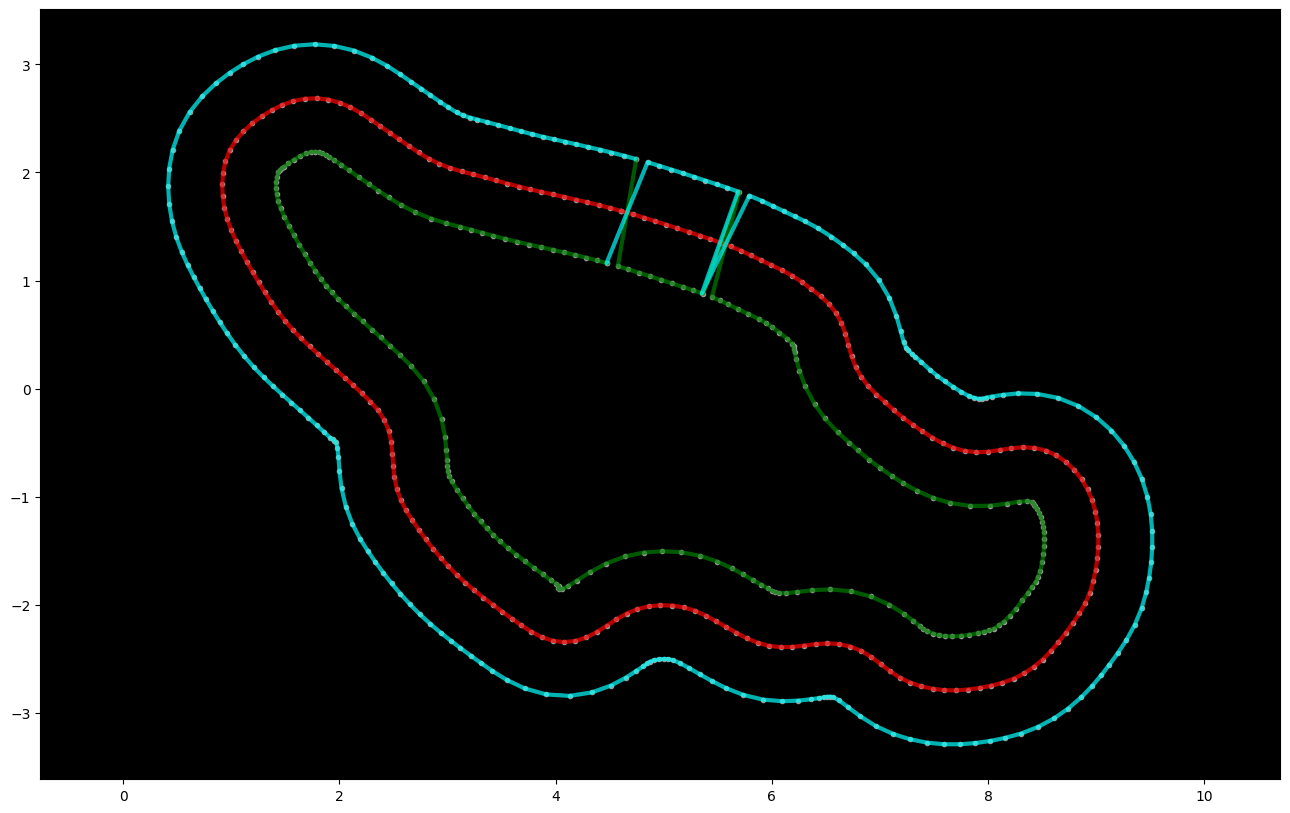

In [125]:
fig = plt.figure(1, figsize=(16, 10))
ax = fig.add_subplot(111, facecolor='black')
plt.axis('equal')
np_outer_points = np.asarray(new_outer_points)
np_inner_points = np.asarray(new_inner_points)
print_border(ax, center_line, np_inner_points, np_outer_points)